In [46]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from tensorflow.keras.models import Sequential

In [47]:
(x_train, y_train),(x_test,y_test)=datasets.mnist.load_data()

In [48]:
x_train.shape

(60000, 28, 28)

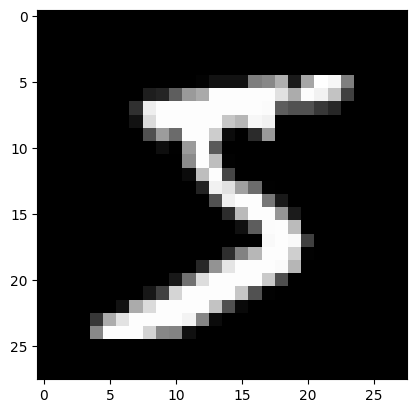

In [49]:
plt.imshow(x_train[0],cmap='gray')

In [54]:
print(y_train[0])
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

num_classes = 10
y_train_norm = keras.utils.to_categorical(y_train, num_classes)
y_test_norm = keras.utils.to_categorical(y_test, num_classes)

x_train_norm = x_train.astype('float32') / 255
x_train_norm = x_train.astype('float32') / 255

5
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [55]:
model = Sequential()
#image preprocessing
model.add(layers.Conv2D(6,(3,3), strides= (1,1), padding= 'same', activation='relu', input_shape = (28,28,1))) #6 kernals ((3*3+1)*6) = 60 param
model.add(layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)))
model.add(layers.Flatten())
#model layers
model.add(layers.Dense(128, activation='relu')) #128 neuron
model.add(layers.Dense(10, activation='softmax')) #10 output

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1176)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       150,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 152,006 (593.77 KB)

 Trainable params: 152,006 (593.77 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
history = model.fit(x_train_norm, y_train_norm, epochs=10, batch_size=100)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.8470 - loss: 0.5603
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.9504 - loss: 0.1674
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9684 - loss: 0.1051
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9749 - loss: 0.0831
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.9800 - loss: 0.0657
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9840 - loss: 0.0516
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9867 - loss: 0.0436
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9898 - loss: 0.0334
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9919 - loss: 0.0268
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9924 - loss: 0.0237


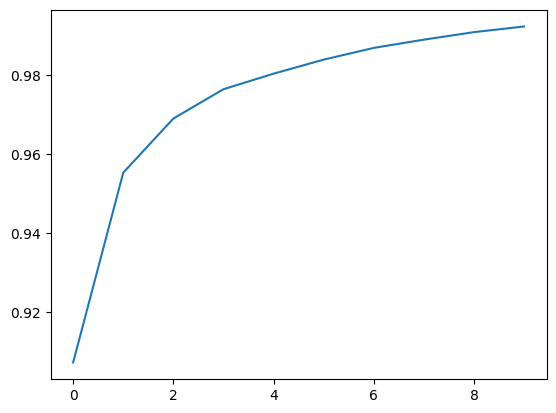

In [58]:
plt.plot (history.history['accuracy'])

In [59]:
history = model.evaluate(x_test_norm, y_test_norm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9767 - loss: 0.0770
